In [1]:
#conexión odbc, pandas y numpy
#%%
import pandas as pd
import pyodbc
import numpy as np
import os
import sys
import pickle
conn = pyodbc.connect( "DSN=impala-prod", autocommit = True)

In [3]:
#carga librerias python 
#import librerias necesarias 
from sklearn import preprocessing as prep
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,explained_variance_score
from sklearn.metrics import roc_auc_score, confusion_matrix, silhouette_score,silhouette_samples
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing     import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pprint import pprint

In [4]:
df = pd.read_csv("D:/REENTRENAMIENTO/Reent_version1/banistmo_calificada_comport_temp_.csv",header = 0, sep = ',')

In [9]:
df1 = pd.read_csv("D:/REENTRENAMIENTO/Reent_version1/banistmo_calificada_comport_temp_zr_1.csv",header = 0, sep = ',')

In [15]:
df2 = pd.read_csv("D:/REENTRENAMIENTO/Reent_version1/base_hist_banistmo_calificada_final_regla_auc_201709.csv",header = 0, sep = ',')

In [16]:
df2.head()

,id,fa,prediction,escala_riesgo_final,flag_regla,default_90_12m
0,98648240,201709,0.016296,G2,0,0
1,565644,201709,0.094554,G6,0,0
2,42414,201709,0.063838,G5,0,0
3,98679159,201709,0.046043,G5,0,0
4,98663231,201709,0.020033,G3,0,0


In [3]:
df = pd.read_csv("D:/REENTRENAMIENTO/Reent_version1/base_entrenamiento_escenario_avg_completa_nv.csv",header = 0, sep = ',')

KeyboardInterrupt: 

### base inicial, esta base a calificar contiene las variables seleccionadas en el entrenamiento del modelo

In [4]:
#llamada a la base con pull de variables
df = pd.read_sql("""select fecha,id,ddir_cliente,sob_cliente,deuda_actual_pp,deuda_actual_auto,atm_fa_cont,prom_atm_fa_3m,
prom_atm_fa_6m,prom_atm_fa_12m,repr_ddir_cliente,mora_1_5,
std_atm_fa_12m,std_atm_fa_3m,std_atm_fa_6m,prom_util_tdc_12m, std_util_tdc_12m,marca_huesped_pura, cnt_rodamientos_24m,
cnt_ddir_cliente, cnt_sob_cliente, cnt_huesped_pura_cliente, mora_6_10, mora_11_15, mora_16_20, 
mora_21_25,mora_26_30, repr_rodamientos_24m, repr_sob_cliente,repr_huesped_pura_cliente, repr_mora_61_comp,
mora_1_30_cat,prediction,saldok,default_90_12m
from proceso_riesgos.sin_default_fa_reent_1_30_max_temp_all_vars_df where fecha>=201601""", conn)

In [6]:
df_gs = df[['fecha','id','default_90_12m','prediction']]

In [7]:
df_gs.shape

(5045602, 4)

In [ ]:
df_calificar.isna().sum() 

In [4]:
#features_ = df_calificar[['repr_ddir_cliente','deuda_actual_pp','deuda_actual_auto','prom_atm_fa_12m',
 #               'std_atm_fa_12m','prom_util_tdc_12m','std_util_tdc_12m','repr_huesped_pura_cliente',
  #              'repr_rodamientos_24m','repr_mora_61_comp','prediction','atm_fa_cont']]

In [ ]:
features_ = ['util_tdc_f0', 'prom_saldo_pp', 'cat_moras', 'deuda_actual_pp',
       'saldok', 'prom_ult12', 'ln_atmfa', 'saldo_pp_final', 'pp_x_saldopp',
       'sum_mora_ult12', 'prom_ult3', 'marca_rodamiento', 'prom_ult24',
       'prom_saldo_tdc', 'sum_mora_ult24', 'cupo_tdc', 'sttdev_util_tdc_6m',
       'util_tdc_fp6', 'saldo_tdc_final', 'nonull_ult24', 'sum_mora_ult6',
       'prom_util_tdc_6m', 'prom_ult18',]

In [ ]:
features_.isna().sum()

In [5]:
##llamar modelo guardado
pickle_file_C = open("D:\modelo_premora_version_final_201501.sav","rb")

In [6]:
modelC = pickle.load(pickle_file_C) 

In [7]:
modelC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=94, n_jobs=-1,
                       oob_score=False, random_state=4572, verbose=0,
                       warm_start=False)

### Calificación Base Completa

In [ ]:
probs=modelC.predict_proba(df_calificar[features_])

In [ ]:
probs

In [ ]:
probs_default= [item[1] for item in probs]

In [ ]:
df_calificar['probs_default']=probs_default

In [ ]:
base_final1=df_calificar

In [ ]:
base_final1.head()

In [ ]:
#prediccion prom entrenamiento
pred_train = base_final1[(base_final1.fecha>=201501) & (base_final1.fecha<=201706)]

In [ ]:
pred_oos = base_final1[(base_final1.fecha>=201707) & (base_final1.fecha<=201710)]

In [ ]:
#prom train y prom oos
pred_train["probs_default"].mean()

In [ ]:
pred_oos["probs_default"].mean()

In [ ]:
base1 = base_final1[(base_final1.fecha>=201501) & (base_final1.fecha<=201706)]

In [ ]:
base2 = base_final1[(base_final1.fecha>=201707) & (base_final1.fecha<=201710)]

In [ ]:
x=base1['probs_default'].values
y=base2['probs_default'].values

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(x, y)

In [ ]:
x1 = base1['probs_default']
y1 = base2['probs_default']

In [ ]:
base3 = pd.DataFrame({
    'x': x1,
    'y': y1,
})

In [ ]:
ax = base3.plot.kde()

In [ ]:
###otro metodo para calificar

In [15]:
base_calificada=modelC.predict_proba(features_)

In [16]:
base_calificada

array([[0.22853649, 0.77146351],
       [0.95845233, 0.04154767],
       [0.71252332, 0.28747668],
       ...,
       [0.11979641, 0.88020359],
       [0.60935584, 0.39064416],
       [0.51091159, 0.48908841]])

In [18]:
#convierto prediccion en df para unir a base inicial
dataset = pd.DataFrame({'prediction_uno': base_calificada[:,0]})

In [19]:
base_final = df_calificar.join(dataset,how="outer")

In [20]:
base_final1 = pd.concat([df_calificar, dataset], axis=1)

In [21]:
base_final1.head(5)

,fecha,id,ddir_cliente,sob_cliente,deuda_actual_pp,deuda_actual_auto,atm_fa_cont,prom_atm_fa_3m,prom_atm_fa_6m,prom_atm_fa_12m,...,repr_rodamientos_24m,repr_sob_cliente,repr_huesped_pura_cliente,repr_mora_61_comp,mora_1_30_cat,prediction,saldok,marca_diciembre,default_90_12m,prediction_uno
0,201807,98914714,1,0,0.360467,0.0,22,13.666667,6.833333,9.166667,...,0.130435,0.0,0.000000,0.0,5,0.502289,4661.10,0,1,0.228536
1,201807,478309,1,0,0.450767,0.0,2,1.000000,1.000000,3.416667,...,0.160000,0.0,0.000000,0.0,1,0.062833,2062.97,0,0,0.958452
2,202003,99025685,0,0,0.950302,0.0,12,3.000000,1.500000,0.750000,...,0.052632,0.0,0.000000,0.0,3,0.191961,9396.31,0,0,0.712523
3,201901,674483,0,0,0.000000,0.0,10,6.333333,4.333333,3.600000,...,0.272727,0.0,0.090909,0.0,2,0.260504,6042.14,0,0,0.873666
4,201410,98510113,1,0,0.584744,0.0,17,16.000000,16.000000,14.666667,...,0.080000,0.0,0.000000,0.0,4,0.078005,2435.87,0,0,0.955514


In [ ]:
#escribir base calificada completa
base_final1.to_csv(r'D:\base_completa_calificada_despues_RM.csv', header=1, index=None, sep=';')

In [22]:
base_final1['prediction_uno'].quantile([.1, .25, .5, .75, .80, .85, .90, .95]) 

0.10    0.255676
0.25    0.592539
0.50    0.837092
0.75    0.926764
0.80    0.940979
0.85    0.952835
0.90    0.962998
0.95    0.979393
Name: prediction_uno, dtype: float64

In [23]:
series = pd.Series(base_final.prediction_uno)

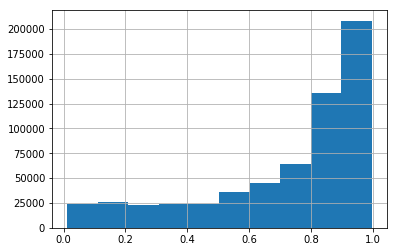

In [24]:
hist=series.hist()

In [25]:
def get_hist(ax):
    n,bins = [],[]
    for rect in ax.patches:
        ((x0,y0),(x1,y1)) = rect.get_bbox().get_points()
        n.append(y1-y0)
        bins.append(x0)
    bins.append(x1)
    
    return n, bins
n, bins = get_hist(hist)

print(n)
print(bins)

plt.show()

[23825.0, 26139.0, 22971.0, 23549.0, 24154.0, 35689.0, 45086.0, 64178.0, 135585.0, 208467.0]
[0.011776940222488486, 0.11031721422655452, 0.2088574882306205, 0.3073977622346866, 0.4059380362387526, 0.5044783102428188, 0.6030185842468847, 0.7015588582509507, 0.8000991322550168, 0.8986394062590828, 0.9971796802631487]


### Pruebas base calificada

In [21]:
#Gs modelo original
def f(row):
    if row['prediction'] < 0.009:
        val = 1
    elif row['prediction'] < 0.017:
        val = 2
    elif row['prediction'] < 0.03:
        val = 3
    elif row['prediction'] < 0.042:
        val = 4
    elif row['prediction'] < 0.08:
        val = 5
    elif row['prediction'] < 0.14:
        val = 6
    elif row['prediction'] < 0.28:
        val = 7
    elif row['prediction'] <= 1:
        val = 8
    else:
        val = 20
    return val

In [8]:
def nm(row):
    current_prediction = row['prediction_uno']
    if current_prediction > row['prediction']:
        current_prediction = row['prediction']
    if current_prediction < 0.012:
        val = 'G1_n'
    elif current_prediction < 0.11:
        val = 'G2_n'
    elif current_prediction < 0.21:
        val = 'G3_n'
    elif current_prediction < 0.31:
        val = 'G4_n'
    elif current_prediction < 0.41:
        val = 'G5_n'
    elif current_prediction < 0.50:
        val = 'G6_n'
    elif current_prediction < 0.60:
        val = 'G7_n'
    elif current_prediction <= 1:
        val = 'G8_n'
    else:
        val = 'G20_n'
    return val

In [20]:
df['Gs_original_cat'] = df.apply(f, axis=1)

KeyError: ('prediction', 'occurred at index 0')

In [10]:
df.head()

,fecha,id,prediction,escala_riesgo,default_90_12m,Gs_original_cat
0,201902,98826068,0.046405,G5,0,5
1,201902,531512,0.011667,G2,0,2
2,201902,98677140,0.414894,G8,0,8
3,201902,98616670,0.022732,G3,0,3
4,201902,98842253,0.070353,G5,0,5


In [30]:
base_final1.head(5)

,fecha,id,ddir_cliente,sob_cliente,deuda_actual_pp,deuda_actual_auto,atm_fa_cont,prom_atm_fa_3m,prom_atm_fa_6m,prom_atm_fa_12m,...,repr_huesped_pura_cliente,repr_mora_61_comp,mora_1_30_cat,prediction,saldok,marca_diciembre,default_90_12m,prediction_uno,Gs_original,Gs_nuevo_modelo
0,201807,98914714,1,0,0.360467,0.0,22,13.666667,6.833333,9.166667,...,0.000000,0.0,5,0.502289,4661.10,0,1,0.228536,G8,G4_n
1,201807,478309,1,0,0.450767,0.0,2,1.000000,1.000000,3.416667,...,0.000000,0.0,1,0.062833,2062.97,0,0,0.958452,G5,G2_n
2,202003,99025685,0,0,0.950302,0.0,12,3.000000,1.500000,0.750000,...,0.000000,0.0,3,0.191961,9396.31,0,0,0.712523,G7,G3_n
3,201901,674483,0,0,0.000000,0.0,10,6.333333,4.333333,3.600000,...,0.090909,0.0,2,0.260504,6042.14,0,0,0.873666,G7,G4_n
4,201410,98510113,1,0,0.584744,0.0,17,16.000000,16.000000,14.666667,...,0.000000,0.0,4,0.078005,2435.87,0,0,0.955514,G5,G2_n


In [31]:
#matriz general
new_data = base_final1.pivot_table(values='id', index='Gs_original', columns='Gs_nuevo_modelo',
                         aggfunc=lambda x: len(x))

In [ ]:
#matriz por fecha de analisis
new_data = base_final1[base_final1.fecha==202003].pivot_table(values='id', index='Gs_original', columns='Gs_nuevo_modelo',
                                                            aggfunc=lambda x: len(x.unique()))

In [32]:
new_data

Gs_nuevo_modelo,G1_n,G2_n,G3_n,G4_n,G5_n,G6_n,G7_n
Gs_original,,,,,,,
G1,1121.0,NaN,NaN,NaN,NaN,NaN,NaN
G2,1919.0,9136.0,NaN,NaN,NaN,NaN,NaN
G3,NaN,27211.0,NaN,NaN,NaN,NaN,NaN
G4,NaN,16552.0,NaN,NaN,NaN,NaN,NaN
G5,NaN,78318.0,NaN,NaN,NaN,NaN,NaN
G6,NaN,44169.0,45911.0,NaN,NaN,NaN,NaN
G7,NaN,NaN,84735.0,73453.0,NaN,NaN,NaN
G8,1.0,23709.0,26522.0,54378.0,96945.0,23024.0,2539.0


In [ ]:
base_final1['g_ultima'] = base_final1.Gs_nuevo_modelo.replace('_n','')

In [ ]:
base_final1.head()

In [ ]:
base_final1['g_ultima'] = base_final1['g_ultima'].str.replace('_n','')

In [ ]:
base_final1.head()

In [ ]:
new_data_1 = base_final1[(base_final1.fecha >= 201306) & (base_final1.g_ultima != base_final1.Gs_original)].pivot_table(values='id', index='fecha', columns='g_ultima',
                                                         aggfunc=lambda x: len(x))

 

new_data_1.reset_index(level=0, inplace=True)

 

#new_data.to_csv('recuperados.csv', header=True, index = False)
new_data_1

In [ ]:
new_data_1.to_csv(r'D:\base_completa_recuperados1.csv', header=1, index=None, sep=';')

In [ ]:
new_data_2.to_csv(r'D:\base_completa_recuperados2.csv', header=1, index=None, sep=';')

In [ ]:
new_data_2 = base_final1[(base_final1.fecha >= 201306)].pivot_table(values='id', index='fecha', columns='g_ultima',
                                                         aggfunc=lambda x: len(x))

 

new_data_2.reset_index(level=0, inplace=True)

 

#new_data.to_csv('recuperados.csv', header=True, index = False)
new_data_2

In [14]:
#ordenamiento modelo actual
default_actual = df_gs.pivot_table(values='id', index='Gs_original', columns = 'default_90_12m',
                         aggfunc=lambda x: len(x))

In [15]:
default_actual

default_90_12m,0,1
Gs_original,,
G1,778405,4734
G2,726987,10046
G3,624020,15761
G4,657884,21997
G5,921487,47307
G6,448037,49030
G7,241932,56644
G8,194802,246529


In [24]:
y = df[['default_90_12m']]

In [25]:
x = df[['escala_riesgo_cat']]

In [26]:
clf = LogisticRegression(random_state=0).fit(x, y)

C:\Users\dsosa\AppData\Local\Continuum\anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dsosa\AppData\Local\Continuum\anaconda31\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
roc=roc_auc_score(y, clf.predict_proba(x)[:,1])

In [28]:
roc

0.8419460348600638

In [29]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y, x)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.41


In [ ]:
#ordenamiento modelo nuevo 
default_nuevo = base_final1.pivot_table(values='id', index='Gs_nuevo_modelo', columns = 'default_90_12m',
                         aggfunc=lambda x: len(x))

In [ ]:
default_nuevo

In [ ]:
#ordenamiento actual fuera de tiempo
default_out = base_final1[(base_final1.fecha>=201803) & (base_final1.fecha<=201903)].pivot_table(values='id', index='Gs_original', columns='default_90_12m',
                         aggfunc=lambda x: len(x))

In [ ]:
default_out

In [33]:
#ordenamiento nuevo fuera de tiempo
default_out = base_final1[(base_final1.fecha>=201707) & (base_final1.fecha<=201710)].pivot_table(values='id', index='Gs_nuevo_modelo', columns='default_90_12m',
                         aggfunc=lambda x: len(x))

In [34]:
default_out

default_90_12m,0,1
Gs_nuevo_modelo,,
G1_n,50,1
G2_n,5933,1402
G3_n,5214,2233
G4_n,3872,2511
G5_n,3094,2576
G6_n,776,692
G7_n,99,75


In [ ]:
out_sample = base_final1[(base_final1.fecha>=201306) & (base_final1.fecha<=201802)]

In [ ]:
prediction=out_sample['prediction'].astype(str).astype(float)

In [ ]:
default = out_sample['default_90_12m'].astype(int)

In [ ]:
prediction1 = prediction.as_matrix()

In [ ]:
precision, recall, _ = precision_recall_curve(default, prediction1)

In [ ]:
average_precision = average_precision_score(default, prediction1)
print('Average precision-recall score RF: {}'.format(average_precision))

In [ ]:
(0.6994281871609821 - 0.6115755933409067)*100

In [ ]:
#auc modelo actual
fpr, tpr, _ = metrics.roc_curve(np.array(out_sample['default_90_12m']), out_sample['prediction'])
auc_train = metrics.auc(fpr,tpr)

In [ ]:
auc_train

In [17]:
#auc modelo actual
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(df2['default_90_12m']), df2['prediction'])
auc_train = metrics.auc(fpr,tpr)

In [18]:
auc_train

0.8787536701907463

In [ ]:
saldos = pd.pivot_table(base_final[base_final.fecha==202003], values='saldok', index=['Gs_original'],
                    columns=['Gs_nuevo_modelo'], aggfunc=np.sum)

In [ ]:
saldos